In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler)
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    learning_curve,
    validation_curve)

%matplotlib inline

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values
le=LabelEncoder()
y=le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
le.transform(['M','B'])

array([1, 0])

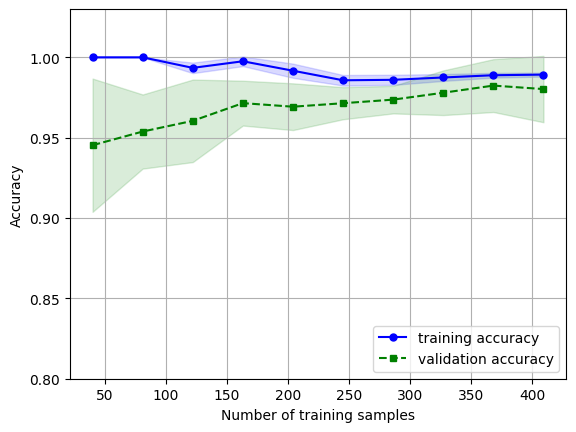

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)
pipe_lr=make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2',
                       max_iter=10000)
)
train_sizes,train_scores,test_scores=learning_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=10,
    n_jobs=1
)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,
         color='blue',marker='o',
         markersize=5,label='training accuracy')
plt.fill_between(
    train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15,color='blue')
plt.plot(
    train_sizes,test_mean,
    color='green',linestyle='--',
    marker='s',markersize=5,
    label='validation accuracy')

plt.fill_between(
    train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.show()

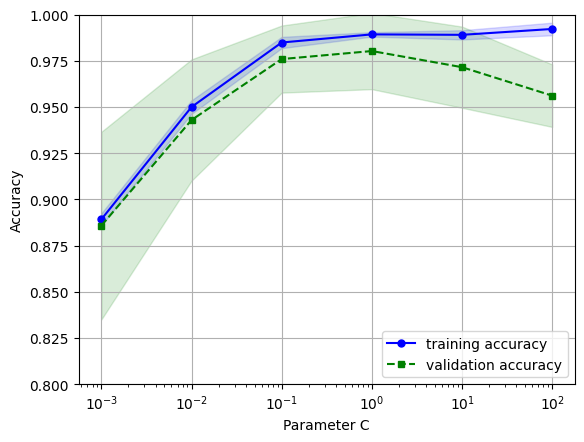

In [14]:
param_range=[0.001,0.01,0.1,1.0,10.0,100.0]
train_scores,test_scores=validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,
            color='blue',marker='o',
            markersize=5,label='training accuracy')

plt.fill_between(param_range,
                    train_mean+train_std,
                    train_mean-train_std,
                    alpha=0.15,color='blue'
)

plt.plot(
    param_range,test_mean,
    color='green',linestyle='--',
    marker='s',markersize=5,
    label='validation accuracy'
)

plt.fill_between(
    param_range,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15,color='green')

plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()